### Vizualize Loss

In [28]:
%matplotlib inline

In [29]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("../forward_model/")
import stacklineplot
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from generate_samples import generate_readings_from_x_t
from generate_samples import generate_readings_from_s_t
from generate_samples import generate_readings

In [30]:
# dir = "~/server/reonconstructed_eegs/"
# dir = "./reonconstructed_eegs/"
# filename = "convVAE-lr1e-4-N256-C44-L1004-A.npy"
# filename = "convVAE-lr1e-5-N256-C44-L1004-C.npy"
# dir = "/Users/DanielLongo 1/server/VAE/"
dir = "../VAE/"
# filename = "test-5-lower_lr.npy"
# filename = "test-5-batch_norm.npy"
filename = "StS-test-3.npy"

In [31]:
costs = np.load(dir + filename, allow_pickle=True)

In [32]:
iters = np.arange(costs.shape[0]) * 100

<function matplotlib.pyplot.show(*args, **kw)>

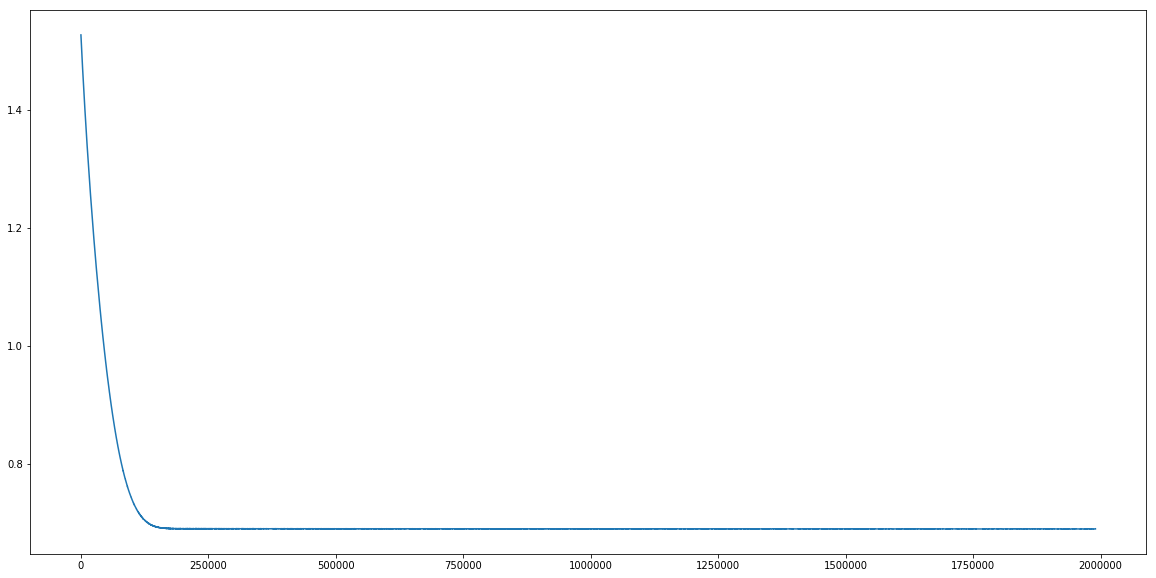

In [33]:
plt.plot(iters, costs)
plt.show

### Generate Samples

In [34]:
# filename = "VAE-test-5-lower_lr"
# filename= "VAE-test-6-batch_norm"
filename = "VAE-StS-test-3-BCE"
num_samples = 4

In [35]:
samples = generate_readings_from_s_t(num_samples, filename, filepath=dir, use_gpu=False)
# samples = generate_readings_from_x_t(num_samples, filename, filepath=dir, use_gpu=False)

In [36]:
samples.shape

(4, 768)

In [37]:
samples[3]

array([-3.25405329e-01, -3.86954457e-01, -2.85418659e-01, -3.08476597e-01,
       -4.69941050e-01, -4.53766942e-01, -4.68660414e-01, -4.38527346e-01,
       -3.74959677e-01, -3.28494519e-01, -2.95819670e-01, -2.79466242e-01,
       -2.38466099e-01, -2.34886870e-01, -2.67554849e-01, -2.74236649e-01,
       -2.51558900e-01, -2.43684366e-01, -2.37810880e-01, -2.38353953e-01,
       -2.48647332e-01, -2.66898841e-01, -2.92226404e-01, -3.30758035e-01,
       -3.78564090e-01, -4.20563608e-01, -4.51692730e-01, -4.65919375e-01,
       -4.74692196e-01, -4.76754367e-01, -4.71881360e-01, -4.68095094e-01,
       -4.65192020e-01, -4.61467952e-01, -4.51714814e-01, -4.27163720e-01,
       -3.93761665e-01, -3.61710757e-01, -3.31621975e-01, -3.05276513e-01,
       -2.89072961e-01, -2.81131685e-01, -2.78731734e-01, -2.79811531e-01,
       -2.85923421e-01, -2.99038947e-01, -3.12810838e-01, -3.23358864e-01,
       -3.30747932e-01, -3.30821991e-01, -3.23078722e-01, -3.07828963e-01,
       -2.87295818e-01, -

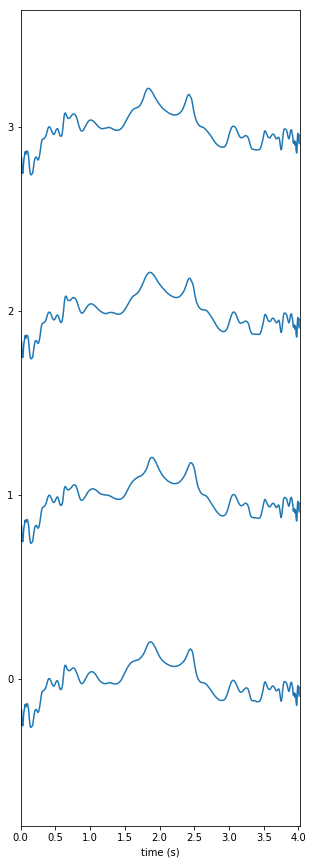

In [27]:
stacklineplot.stackplot(samples, seconds=1004/250, ylabels=[str(i) for i in range(samples.shape[0])], yscale=.33)

### Vizualize Reconstructions

In [20]:
prefix = "A"
iter = 1999

In [18]:
# filename_generated = prefix + "-generated-" + str(iter) + ".npy" 
# filename_original = prefix + "-orginal-" + str(iter) + ".npy"
samples_dir = "../VAE/samples_sensor_to_sensor/"
samples_dir = "../VAE/samples_sensor_to_sensor/"
filename_recon = "test-3-recon.npy"
filename_original = "test-3-original.npy"

In [19]:
generated = np.squeeze(np.load(samples_dir + filename_recon))
original = np.squeeze(np.load(samples_dir + filename_original))

In [20]:
print("generated", generated.shape)
print("original", original.shape)

generated (64, 768)
original (64, 768)


In [21]:
labels = [str(i) for i in range(generated.shape[0])]

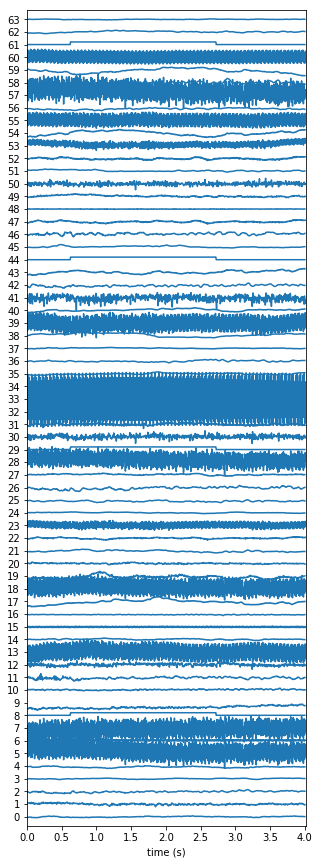

In [22]:
rcParams['figure.figsize'] = 5, 15
stacklineplot.stackplot(original, seconds=1004/250, ylabels=labels, yscale=3)

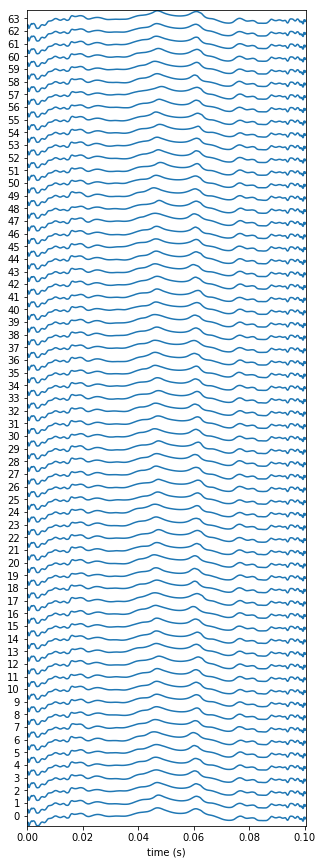

In [43]:
rcParams['figure.figsize'] = 5, 15
stacklineplot.stackplot(generated, seconds=1004/10000, ylabels=labels, yscale=1)

In [25]:
i = 2

In [ ]:
# labels = [str(i) for i in range(generated.shape[2])]

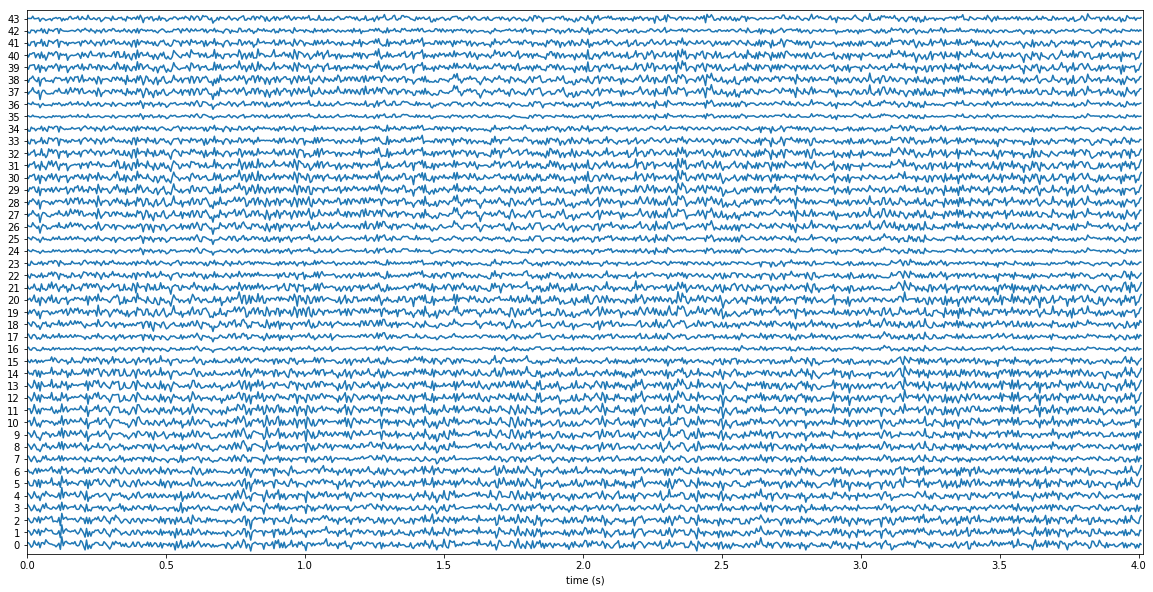

In [26]:
rcParams['figure.figsize'] = 20, 10
stacklineplot.stackplot(original[i], seconds=1004/250, ylabels=labels, yscale=1)
# stacklineplot.stackplot(original.reshape(44,1004), seconds=1004/250, ylabels=labels, yscale=3)

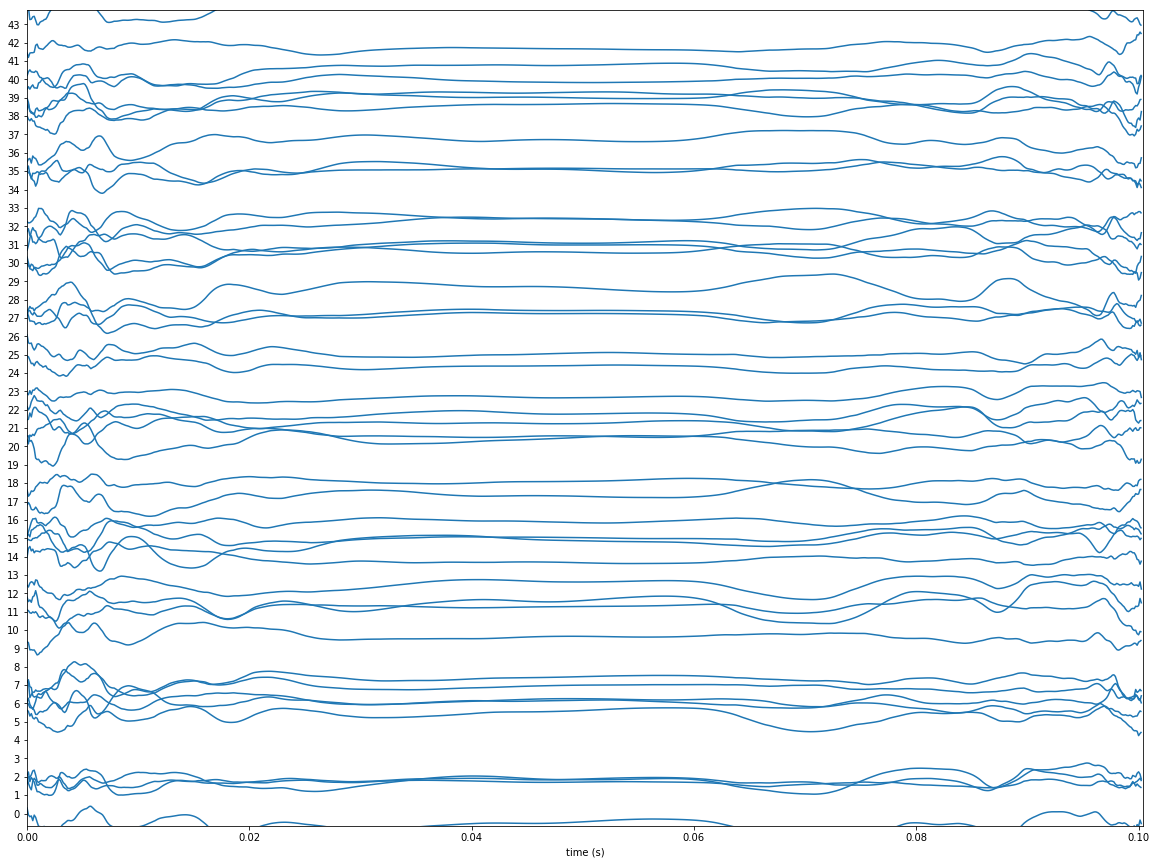

In [27]:
rcParams['figure.figsize'] = 20, 15
stacklineplot.stackplot(generated[i], seconds=1004/10000, ylabels=labels, yscale=1)
# stacklineplot.stackplot(generated.reshape(44,1004), seconds=1004/250, ylabels=labels, yscale=3)